# Avocado Project
### EDA

In [1]:
# importing libraries and filtering warnings
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import SCORERS
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset
df=pd.read_csv('avocado.csv')

In [3]:
# First 5 records
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Last 5 records
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
# (rows, columns) in df
df.shape

(18249, 14)

In [6]:
# Memory size of df
df.size

255486

In [7]:
# Base information of df
# -- no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
# Unnamed column is not useful so we are removing it.
# Date is redundant information with high specificity. Therefore removing it
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)

In [9]:
# Data types of columns in df
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [10]:
# Statistical description of numerical columns in df
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
# Unique values in type column
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [12]:
#encoding the Type column to int64 Dtype this will convert the data into continuous data
lab_enc=LabelEncoder()
data=lab_enc.fit_transform(df['type'])
df['type']=data
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [13]:
# Value count of unique elements in type column
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [14]:
# List of regions
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [15]:
#encoding the Region column to int64 Dtype this will convert the data into continuous data
lab_enc=LabelEncoder()
data=lab_enc.fit_transform(df['region'])
df['region']=data
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


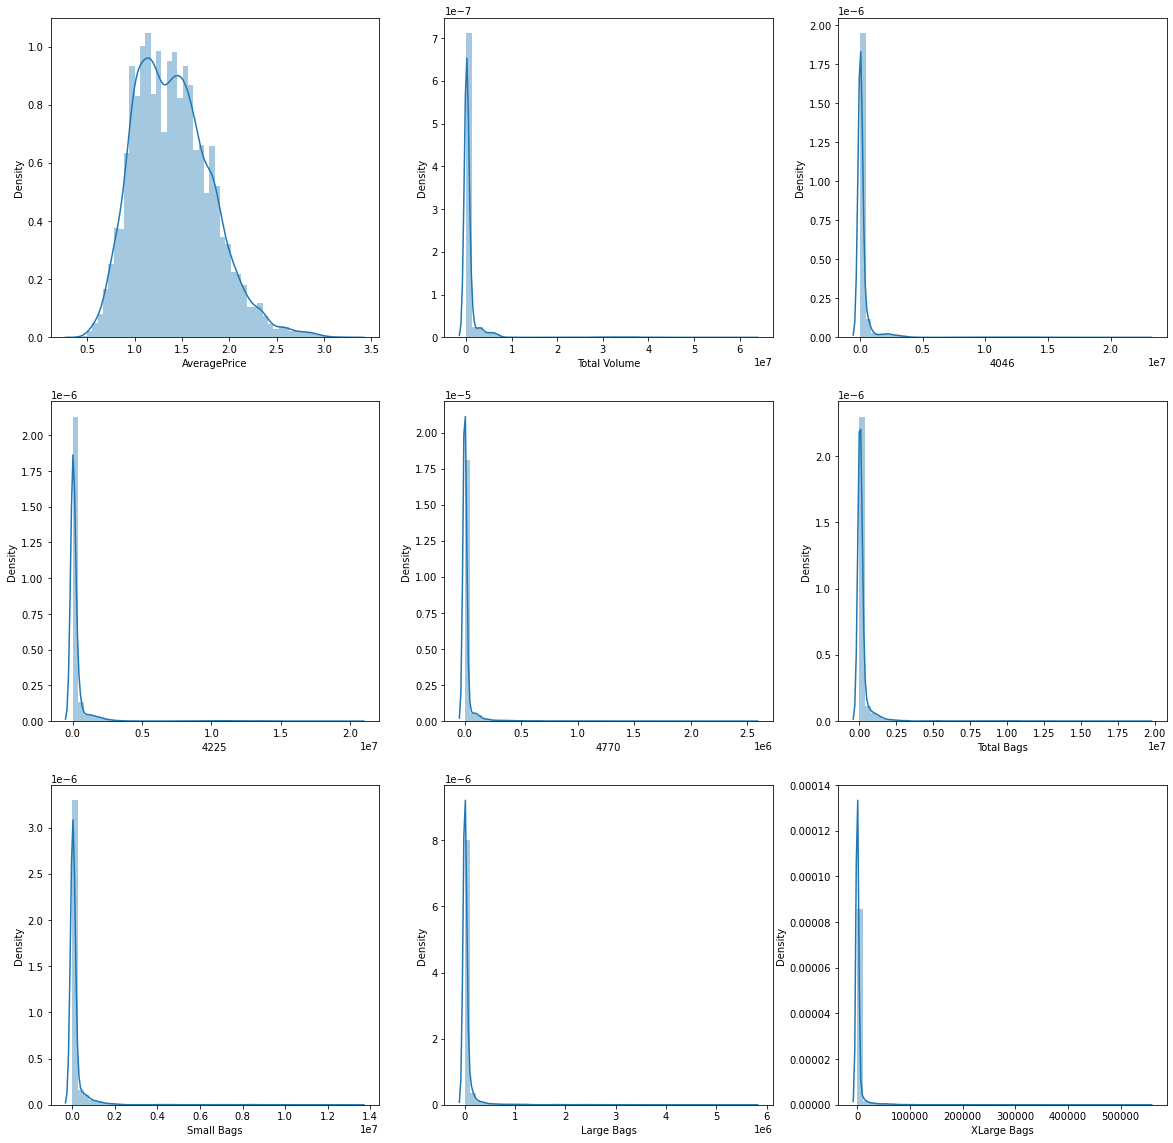

In [16]:
#Distribution of the df
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in df:
        if plotnumber<=9:
            ax=plt.subplot(3,3,plotnumber)
            sns.distplot(df[i])
            plt.xlabel(i)
        plotnumber+=1

 - Skew and outliers detected

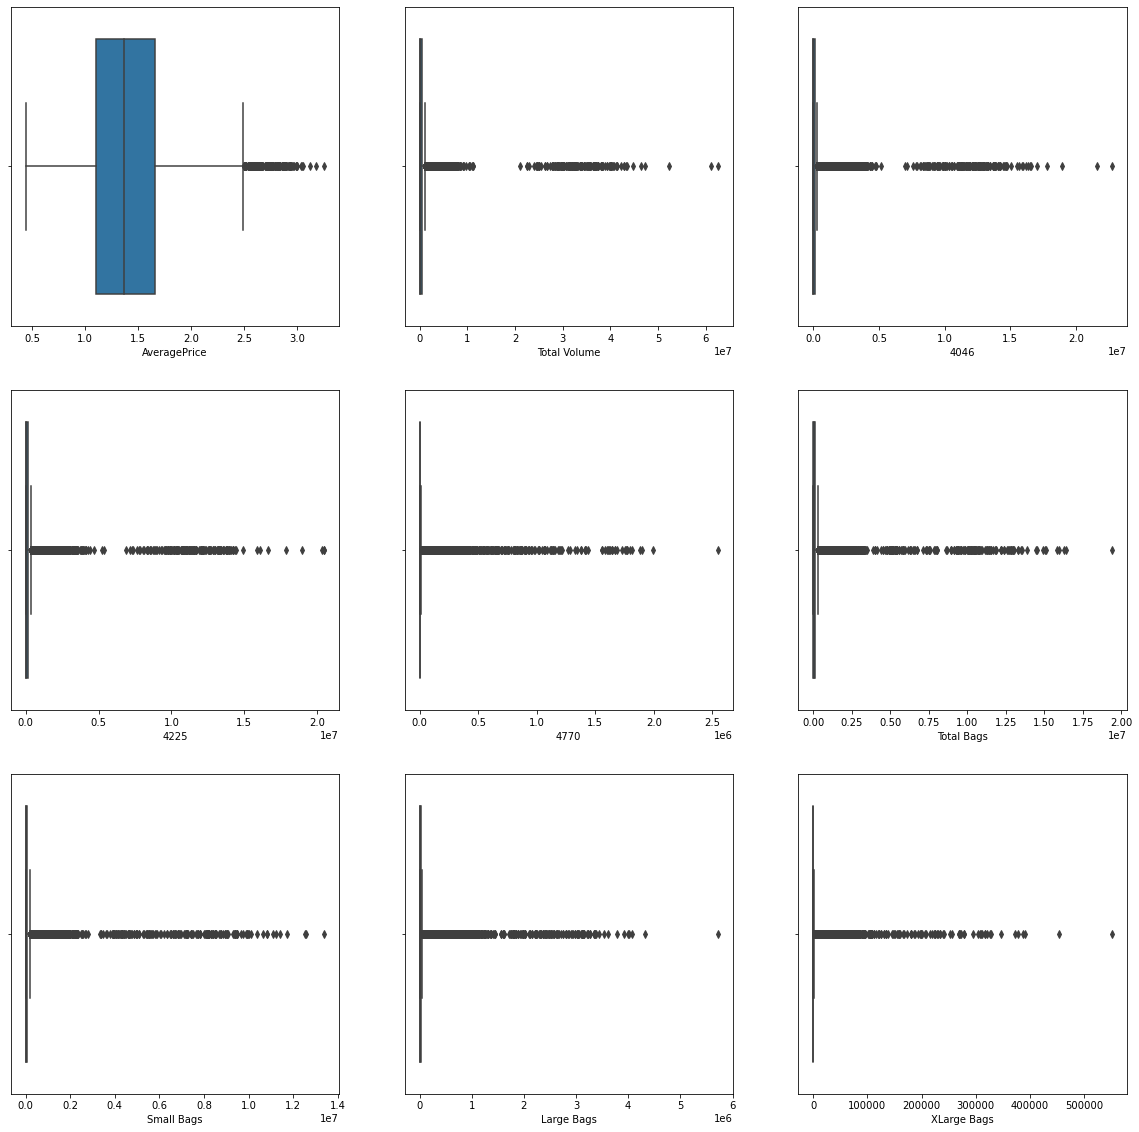

In [17]:
# Visualising outliers

plt.figure(figsize=(20,20))
plotnumber=1
for i in df:
        if plotnumber<=9:
            ax=plt.subplot(3,3,plotnumber)
            sns.boxplot(df[i])
            plt.xlabel(i)
        plotnumber+=1

In [18]:
#Removing outliers using zscore
z=np.abs(stats.zscore(df))
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428]),
 array([2, 2, 8, ..., 0, 0, 0]))

In [19]:
index=(np.where(z>3)[0])
df=df.drop(df.index[index])

In [20]:
df.shape

(17651, 12)

18249 - 17651 = 598 rows dropped || 100 - (17651*100)/18249 = 3.2768918844868153 (data loss)

In [21]:
# Skew values before pre-processing
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

Text(0.5, 1.0, 'Average Price')

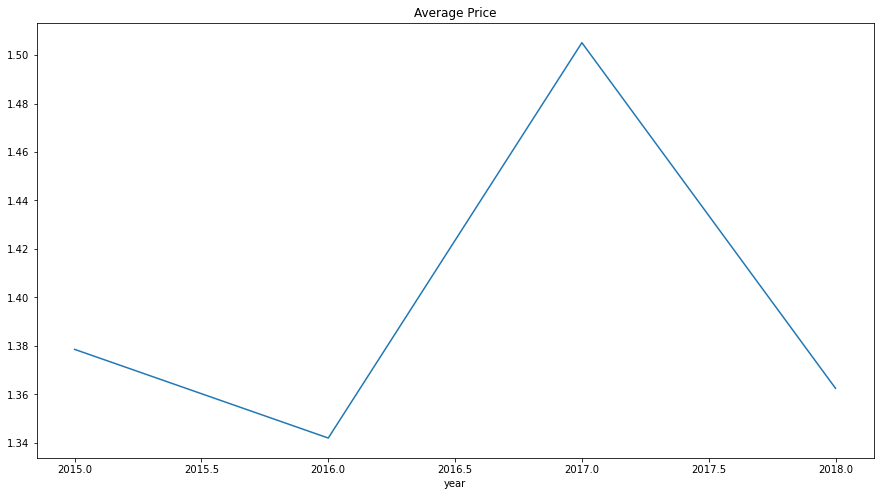

In [23]:
# Average price distibution across years
Date=df.groupby('year').mean()
plt.figure(figsize=(15,8))
Date['AveragePrice'].plot()
plt.title('Average Price')

In [24]:
# Mean of Average Price
df['AveragePrice'].mean()

1.4053634354994082

In [25]:
# Max of Average Price
df['AveragePrice'].max()

2.61

In [26]:
# Min of Average Price
df['AveragePrice'].min()

0.44

In [27]:
# Regional sales using volume
df.groupby('region')['Total Volume'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
0,338.0,4.753787e+04,4.984885e+04,774.20,1881.5850,24036.765,9.289728e+04,216738.47
1,337.0,2.628830e+05,2.631480e+05,3047.38,10969.9200,331377.530,4.928364e+05,957792.07
2,338.0,3.985619e+05,3.872537e+05,6884.09,18552.2575,302414.665,7.497620e+05,1225103.27
3,329.0,4.376575e+04,4.250283e+04,562.64,2373.9500,54191.140,8.237777e+04,136377.55
4,338.0,2.877929e+05,2.844129e+05,1948.28,12547.8250,194500.520,5.536088e+05,999783.13
5,338.0,6.793630e+04,6.626016e+04,379.82,4487.1850,49414.225,1.319028e+05,201142.55
6,290.0,2.459960e+06,2.799407e+06,70004.38,133107.5600,201278.920,5.557503e+06,8153340.48
7,332.0,1.069236e+05,1.032830e+05,2390.22,7015.8325,137233.485,2.006158e+05,411160.94
8,338.0,3.955690e+05,3.846002e+05,9910.84,29956.2450,231780.020,7.639302e+05,1802646.35


<AxesSubplot:xlabel='AveragePrice'>

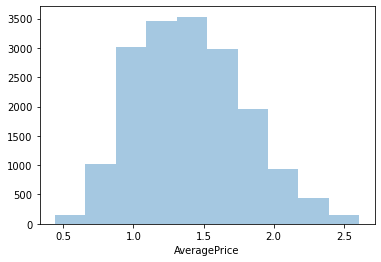

In [28]:
# distribution of Average price
sns.distplot(df['AveragePrice'],bins=10, kde=False)

<AxesSubplot:>

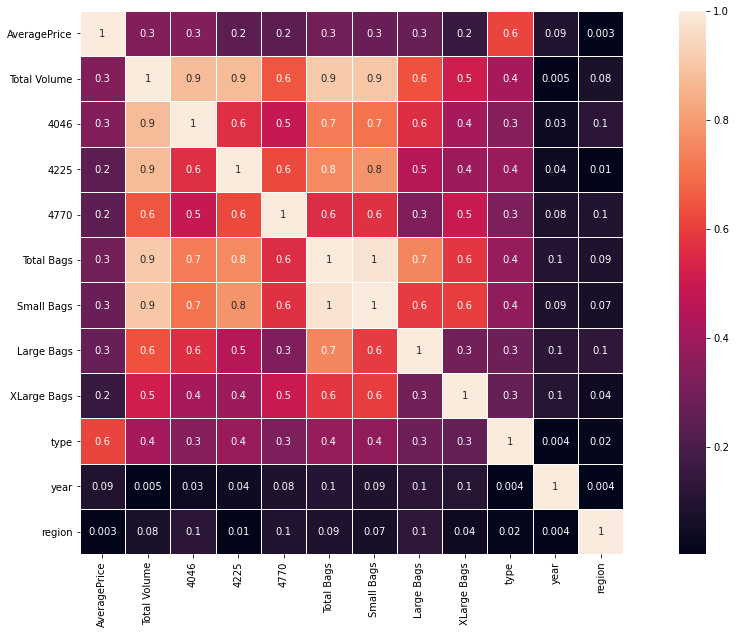

In [29]:
# Correlation plot of columns in df
df_corr=df.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True,square=True,fmt='.1g',linewidth=1)

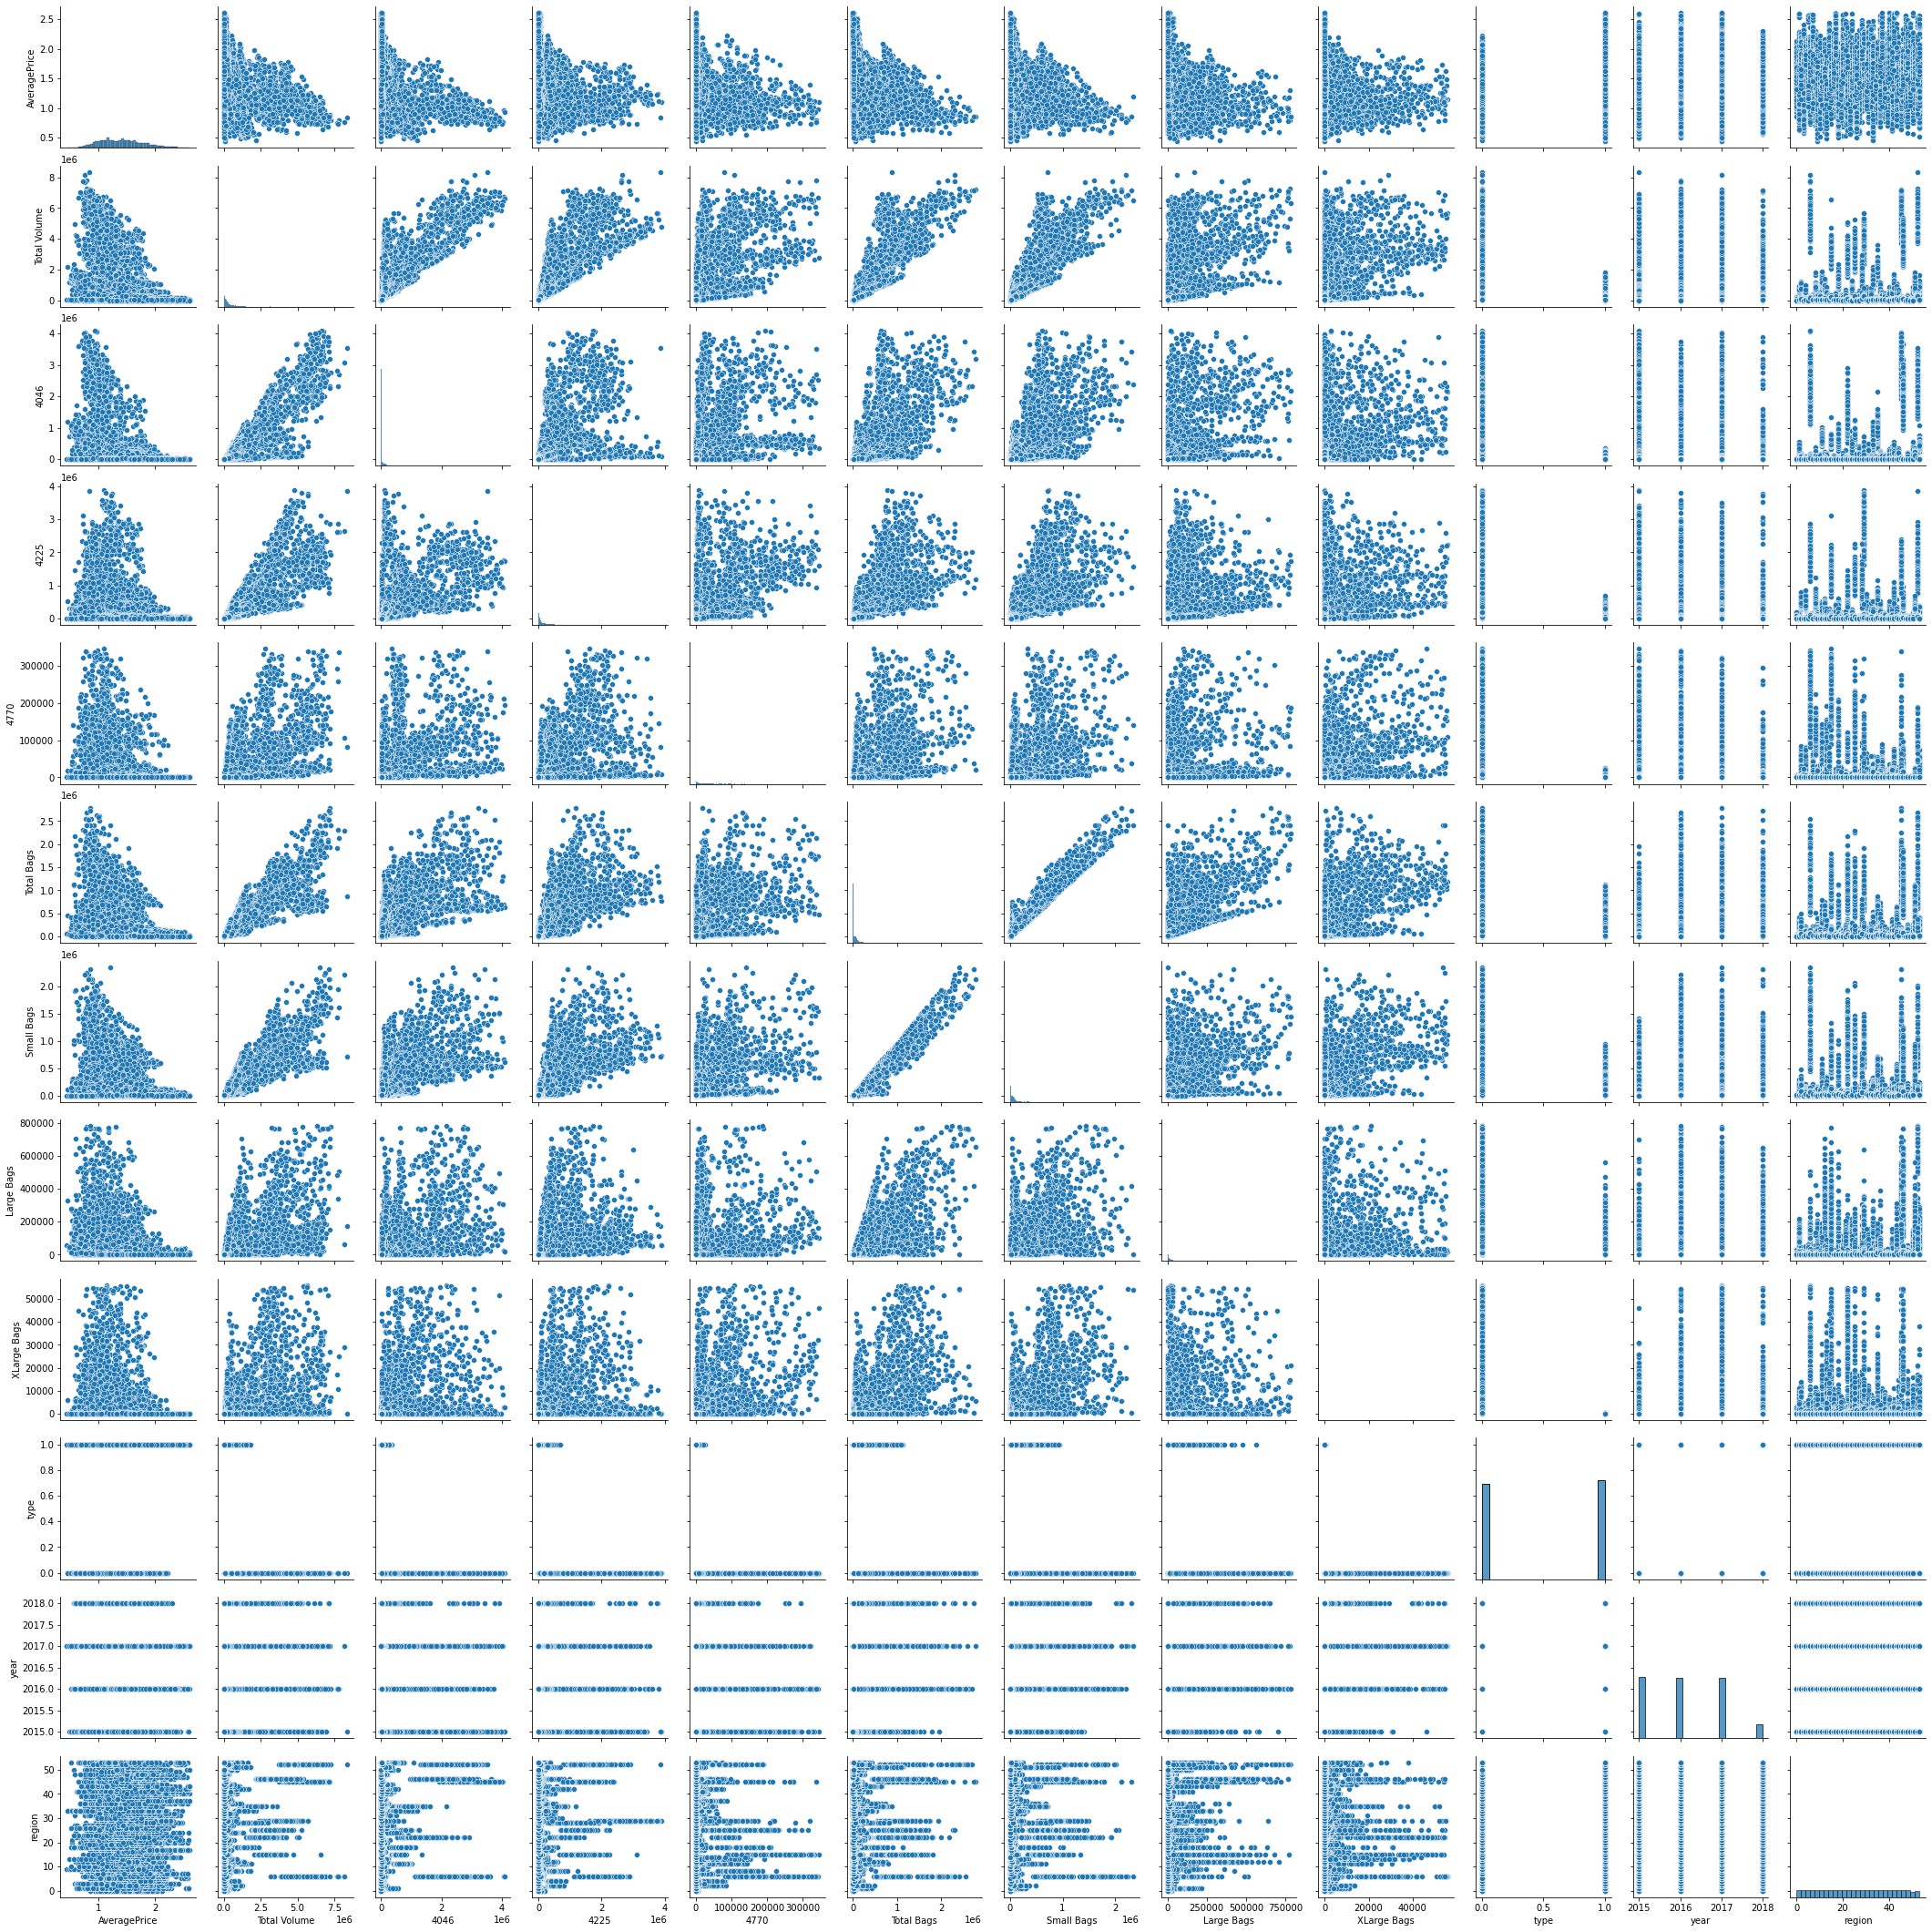

In [30]:
# Pairplot visualisation of df
sns.pairplot(df)

In [32]:
# Separating features and labels
X=df.drop(columns=['AveragePrice'],axis=1)
y=df['AveragePrice']

In [35]:
# Treating Skew
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(X)

In [36]:
data_new=pd.DataFrame(data_new,columns=X.columns)
data_new.skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.227731
region         -0.257799
dtype: float64

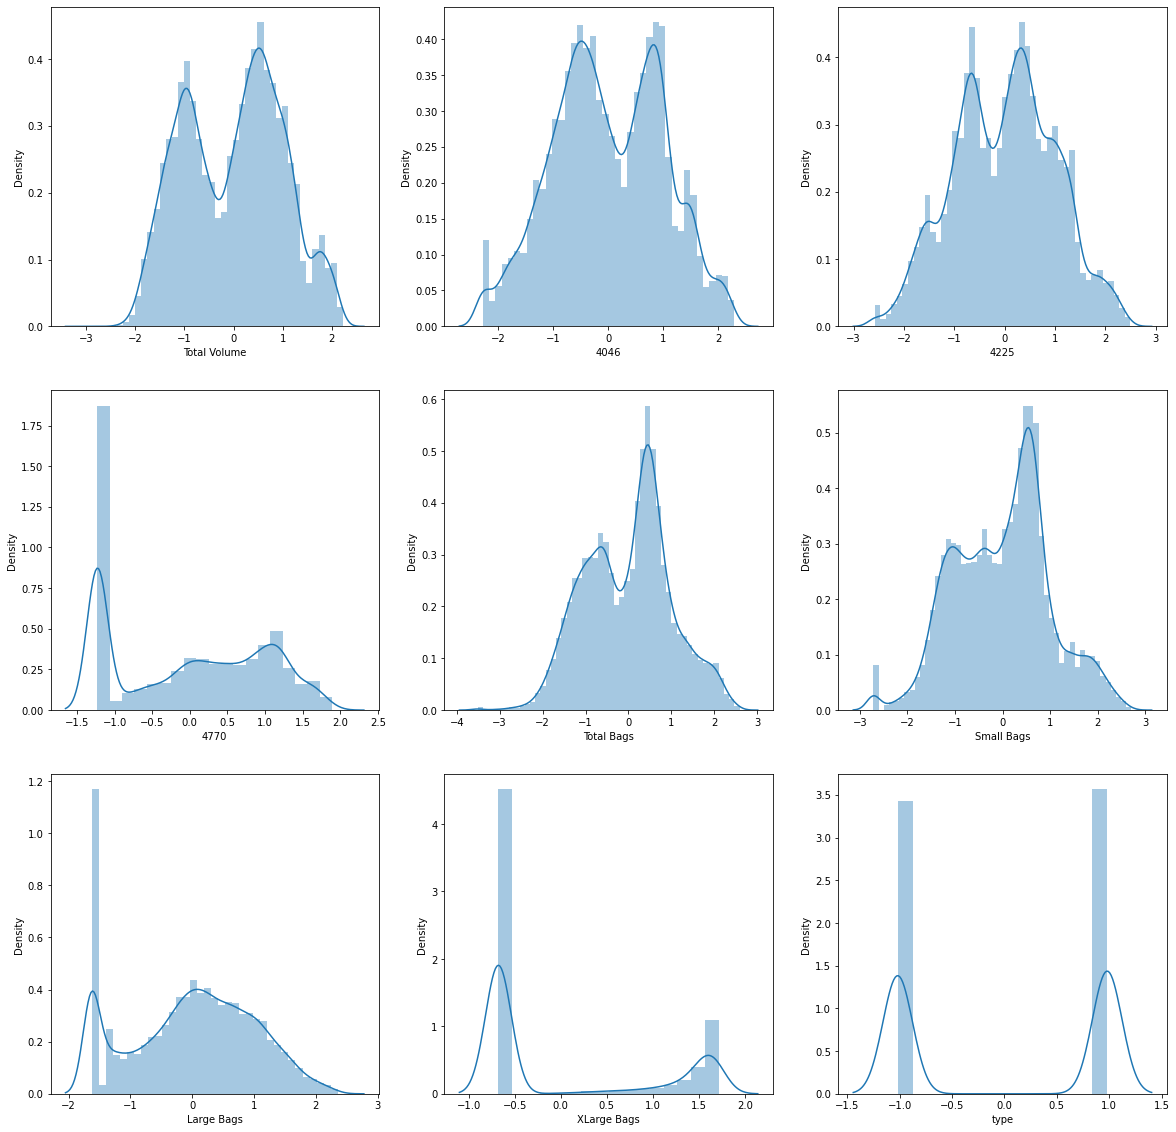

In [37]:
# Data distribution after skew removal
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

In [38]:
X = data_new
scaler=StandardScaler()
X=scaler.fit_transform(X)

### Model

In [40]:
# GPU stat 
import GPUtil
GPUtil.showUtilization()

| ID | GPU | MEM |
------------------
|  0 |  2% |  2% |


In [42]:
# Finding best random state
min_squared_error = 0
max_random_state = 1
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    model=XGBRegressor(tree_method='gpu_hist', gpu_id=0)
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    root_mean_squared_error=np.sqrt(mean_squared_error(y_test,pred))
    if root_mean_squared_error<min_squared_error:
        min_squared_error=root_mean_squared_error
        max_random_state=i
        
print('lowest error is: ',min_squared_error,' on random_state ',max_random_state)

lowest error is:  0  on random_state  1


In [44]:
# List of models to be used
en = ElasticNet()
dtr = DecisionTreeRegressor(random_state=1)
rfr = RandomForestRegressor(random_state=1)
ar = AdaBoostRegressor(random_state=1)
gbr= GradientBoostingRegressor(random_state=1)
sr = SVR()
lgr=LGBMRegressor(random_state=1)
xgbr = XGBRegressor(tree_method='gpu_hist', gpu_id=0, random_state = 1)

m_list= [en,dtr,rfr,ar,gbr,sr,lgr,xgbr]

s=SCORERS
s.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [45]:
#seperating the training data and test data:-
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [46]:
# Fitting models
for m in m_list:
    m.fit(X_train,y_train)
    preds = m.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test,preds))
    print(m)
    print('Root_mean_squared_error: ',rmse)
    print('cross validation scores below:--  \n',m)
    print('root_mean_squared_error: ',cross_val_score(m,X,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,X,y,cv=5,scoring='neg_root_mean_squared_error').mean())
    print('\n')
    print('\n')

ElasticNet()
Root_mean_squared_error:  0.38800257663473375
cross validation scores below:--  
 ElasticNet()
root_mean_squared_error:  -0.41672010817922345
difference between model score and cross validation score:  0.028717531544489694




DecisionTreeRegressor(random_state=1)
Root_mean_squared_error:  0.2170832378955745
cross validation scores below:--  
 DecisionTreeRegressor(random_state=1)
root_mean_squared_error:  -0.3641700255478427
difference between model score and cross validation score:  0.14708678765226824




RandomForestRegressor(random_state=1)
Root_mean_squared_error:  0.15492417073603373
cross validation scores below:--  
 RandomForestRegressor(random_state=1)
root_mean_squared_error:  -0.26437576260454454
difference between model score and cross validation score:  0.1094515918685108




AdaBoostRegressor(random_state=1)
Root_mean_squared_error:  0.27627451872979547
cross validation scores below:--  
 AdaBoostRegressor(random_state=1)
root_mean_squared_error:  -0.291860

 - AdaBoostRegressor(random_state=1) has least difference between model score and cross validation score

### Hyper-parameter Tuning (HPT)

In [49]:
# Parameter Grid
grid_param = {'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
              'loss':['linear','square','exponential'],
              'learning_rate':[x for x in np.linspace(0.0001, 0.1, num = 10)]}

In [51]:
# Conducting Grid Sesarch
grid_search=GridSearchCV(AdaBoostRegressor(random_state=1),param_grid=grid_param,cv=5,n_jobs=15,verbose = 2,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=1), n_jobs=15,
             param_grid={'learning_rate': [0.0001, 0.0112, 0.0223,
                                           0.033400000000000006,
                                           0.044500000000000005,
                                           0.055600000000000004,
                                           0.06670000000000001,
                                           0.07780000000000001, 0.0889, 0.1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000, 1100, 1200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [52]:
# Best parameter list
grid_search.best_params_

{'learning_rate': 0.0223, 'loss': 'exponential', 'n_estimators': 400}

In [53]:
# Fitting model with the best parameters
m = AdaBoostRegressor(random_state=1,learning_rate= 0.0223, loss= 'exponential', n_estimators= 400)
m.fit(X_train,y_train)
preds = m.predict(X_test)
rmse= np.sqrt(mean_squared_error(y_test,preds))
print(m)
print('Root_mean_squared_error: ',rmse)
print('cross validation scores below:--  \n',m)
print('root_mean_squared_error: ',cross_val_score(m,X,y,cv=5,scoring='neg_root_mean_squared_error').mean())
print('difference between model score and cross validation score: ',-rmse-cross_val_score(m,X,y,cv=5,scoring='neg_root_mean_squared_error').mean())

AdaBoostRegressor(learning_rate=0.0223, loss='exponential', n_estimators=400,
                  random_state=1)
Root_mean_squared_error:  0.2698893145259217
cross validation scores below:--  
 AdaBoostRegressor(learning_rate=0.0223, loss='exponential', n_estimators=400,
                  random_state=1)
root_mean_squared_error:  -0.28507179500284946
difference between model score and cross validation score:  0.015182480476927773


## Model Saving

In [54]:
# Saving Model
import joblib

joblib.dump(m,'AdaBoost_regressor_best.obj')

['AdaBoost_regressor_best.obj']

In [55]:
# Loading saved model
joblib.load('AdaBoost_regressor_best.obj')

AdaBoostRegressor(learning_rate=0.0223, loss='exponential', n_estimators=400,
                  random_state=1)